<a href="https://colab.research.google.com/github/ormorteey/STA-250-Project/blob/main/STA_250_%5BR%5D_Computational_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("pacman")
library(pacman)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
p_load(tidyverse, googledrive, gridExtra, cluster, factoextra, dendextend)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


gridExtra installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’



factoextra installed



In [4]:
drive_deauth()
drive_user()
public_file = drive_get(as_id("16Z4NYVo85-BcziIoBwgOCnHvUQ59F3Fo"))
drive_download(public_file, overwrite = T)

ℹ Not logged in as any specific Google user.

File downloaded:

• HuGaDB.zip <id: 16Z4NYVo85-BcziIoBwgOCnHvUQ59F3Fo>

Saved locally as:

• HuGaDB.zip



In [5]:
unzip("HuGaDB.zip")

In [6]:
rm(list = ls())

In [74]:
walking_01_00_df = read.table("Data/HuGaDB_v1_walking_01_00.txt", header = T)
head(walking_01_00_df, 6)

,acc_rf_x,acc_rf_y,acc_rf_z,gyro_rf_x,gyro_rf_y,gyro_rf_z,acc_rs_x,acc_rs_y,acc_rs_z,gyro_rs_x,⋯,gyro_ls_z,acc_lt_x,acc_lt_y,acc_lt_z,gyro_lt_x,gyro_lt_y,gyro_lt_z,EMG_r,EMG_l,act
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,-32768,-780,23984,-2983,10095,4931,-32768,-6992,-1720,-4407,⋯,-156,-10128,-8032,-14928,2160,1270,-149,121,149,1
2,-32768,-32768,32767,-3077,8437,5303,-32768,-23248,1592,-2819,⋯,507,-944,11744,-18960,1454,1545,-334,143,118,1
3,-4104,-32768,32767,670,3768,5494,-19016,-20920,-32160,1657,⋯,318,-22584,12088,-17712,553,2108,574,126,105,1
4,-23628,-32768,32767,604,-4726,-1661,-14440,1560,-1600,1111,⋯,424,-19728,8136,-11976,-74,2164,972,82,105,1
5,20224,-18044,17236,1553,-5154,-2546,-17688,-7960,1968,828,⋯,-211,-19776,4528,-9304,-840,2454,-200,97,96,1
6,15436,-8612,14164,307,-4501,-2836,-10224,-328,-3104,2145,⋯,-133,-18240,-1696,-6288,-805,2476,-192,116,90,1


In [75]:
walking_01_01_df = read.table("Data/HuGaDB_v1_walking_01_01.txt", header = T)
walking_01_02_df = read.table("Data/HuGaDB_v1_walking_01_02.txt", header = T)
walking_01_03_df = read.table("Data/HuGaDB_v1_walking_01_03.txt", header = T)


## **Plots for gait dynamic time series**

In [25]:
gait_dynamic_ts_foot_plot_fn = function(mydata, start = 1, end = 500){
color_XYZ = c("X" = "red", "Y" = "green", "Z" = "blue")

# choose a chunk of the time series data
sampledata = mydata[start:end,] 

# plot the right foot accelerator data
p_acc_rf = ggplot(sampledata, aes(x = start:end)) +
  geom_line(aes(y = acc_rf_x, color = "X")) +
  geom_line(aes(y = acc_rf_y, color = "Y")) +
  geom_line(aes(y = acc_rf_z, color = "Z")) +
  scale_color_manual("Direction", values = color_XYZ) + 
  labs(x = "Time",
       y = "Signal",
       title = "Right Foot Accelerator") +
  theme_bw()

# plot the right foot gyroscope data
p_gyro_rf = ggplot(sampledata, aes(x = start:end)) +
  geom_line(aes(y = gyro_rf_x, color = "X")) +
  geom_line(aes(y = gyro_rf_y, color = "Y")) +
  geom_line(aes(y = gyro_rf_z, color = "Z")) +
  labs(x = "Time",
       y = "Signal",
       title = "Right Foot  Gyroscope") +
  scale_color_manual("Direction", values = color_XYZ) +
  theme_bw()

# plot the left foot accelerator data
p_acc_lf = ggplot(sampledata, aes(x = start:end)) +
  geom_line(aes(y = acc_lf_x, color = "X")) +
  geom_line(aes(y = acc_lf_y, color = "Y")) +
  geom_line(aes(y = acc_lf_z, color = "Z")) +
  scale_color_manual("Direction", values = color_XYZ) + 
  labs(x = "Time",
       y = "Signal",
       title = "Left Foot Accelerator") +
  theme_bw()

# plot the left foot gyroscope data
p_gyro_lf = ggplot(sampledata, aes(x = start:end)) +
  geom_line(aes(y = gyro_lf_x, color = "X")) +
  geom_line(aes(y = gyro_lf_y, color = "Y")) +
  geom_line(aes(y = gyro_lf_z, color = "Z")) +
  labs(x = "Time",
       y = "Signal",
       title = "Left Foot Gyroscope") +
  scale_color_manual("Direction", values = color_XYZ) +
  theme_bw()

grid.arrange(p_acc_rf, p_gyro_rf, p_acc_lf, p_gyro_lf, ncol = 1)
}



In [26]:
gait_dynamic_ts_shin_plot_fn = function(mydata, start = 1, end = 500){
color_XYZ = c("X" = "red", "Y" = "green", "Z" = "blue")

# choose a chunk of the time series data
sampledata = mydata[start:end,] 

# plot the right chin accelerator data
p_acc_rf = ggplot(sampledata, aes(x = start:end)) +
  geom_line(aes(y = acc_rs_x, color = "X")) +
  geom_line(aes(y = acc_rs_y, color = "Y")) +
  geom_line(aes(y = acc_rs_z, color = "Z")) +
  scale_color_manual("Direction", values = color_XYZ) + 
  labs(x = "Time",
       y = "Signal",
       title = "Right Shin Accelerator") +
  theme_bw()

# plot the right shin gyroscope data
p_gyro_rf = ggplot(sampledata, aes(x = start:end)) +
  geom_line(aes(y = gyro_rs_x, color = "X")) +
  geom_line(aes(y = gyro_rs_y, color = "Y")) +
  geom_line(aes(y = gyro_rs_z, color = "Z")) +
  labs(x = "Time",
       y = "Signal",
       title = "Right Shin  Gyroscope") +
  scale_color_manual("Direction", values = color_XYZ) +
  theme_bw()

# plot the left shin accelerator data
p_acc_lf = ggplot(sampledata, aes(x = start:end)) +
  geom_line(aes(y = acc_lf_x, color = "X")) +
  geom_line(aes(y = acc_lf_y, color = "Y")) +
  geom_line(aes(y = acc_lf_z, color = "Z")) +
  scale_color_manual("Direction", values = color_XYZ) + 
  labs(x = "Time",
       y = "Signal",
       title = "Left Shin Accelerator") +
  theme_bw()

# plot the left shin gyroscope data
p_gyro_lf = ggplot(sampledata, aes(x = start:end)) +
  geom_line(aes(y = gyro_ls_x, color = "X")) +
  geom_line(aes(y = gyro_ls_y, color = "Y")) +
  geom_line(aes(y = gyro_ls_z, color = "Z")) +
  labs(x = "Time",
       y = "Signal",
       title = "Left Shin Gyroscope") +
  scale_color_manual("Direction", values = color_XYZ) +
  theme_bw()

grid.arrange(p_acc_rf, p_gyro_rf, p_acc_lf, p_gyro_lf, ncol = 1)
}



In [27]:
gait_dynamic_ts_thigh_plot_fn = function(mydata, start = 1, end = 500){
color_XYZ = c("X" = "red", "Y" = "green", "Z" = "blue")

# choose a chunk of the time series data

sampledata = mydata[start:end,] 

# plot the right thigh accelerator data
p_acc_rf = ggplot(sampledata, aes(x = start:end)) +
  geom_line(aes(y = acc_rt_x, color = "X")) +
  geom_line(aes(y = acc_rt_y, color = "Y")) +
  geom_line(aes(y = acc_rt_z, color = "Z")) +
  scale_color_manual("Direction", values = color_XYZ) + 
  labs(x = "Time",
       y = "Signal",
       title = "Right Thigh Accelerator") +
  theme_bw()

# plot the right thigh gyroscope data
p_gyro_rf = ggplot(sampledata, aes(x = start:end)) +
  geom_line(aes(y = gyro_rt_x, color = "X")) +
  geom_line(aes(y = gyro_rt_y, color = "Y")) +
  geom_line(aes(y = gyro_rt_z, color = "Z")) +
  labs(x = "Time",
       y = "Signal",
       title = "Right Thigh  Gyroscope") +
  scale_color_manual("Direction", values = color_XYZ) +
  theme_bw()

# plot the left Thigh accelerator data
p_acc_lf = ggplot(sampledata, aes(x = start:end)) +
  geom_line(aes(y = acc_lt_x, color = "X")) +
  geom_line(aes(y = acc_lt_y, color = "Y")) +
  geom_line(aes(y = acc_lt_z, color = "Z")) +
  scale_color_manual("Direction", values = color_XYZ) + 
  labs(x = "Time",
       y = "Signal",
       title = "Left Thigh Accelerator") +
  theme_bw()

# plot the left thigh gyroscope data
p_gyro_lf = ggplot(sampledata, aes(x = start:end)) +
  geom_line(aes(y = gyro_lt_x, color = "X")) +
  geom_line(aes(y = gyro_lt_y, color = "Y")) +
  geom_line(aes(y = gyro_lt_z, color = "Z")) +
  labs(x = "Time",
       y = "Signal",
       title = "Left Thigh Gyroscope") +
  scale_color_manual("Direction", values = color_XYZ) +
  theme_bw()

grid.arrange(p_acc_rf, p_gyro_rf, p_acc_lf, p_gyro_lf, ncol = 1)
}



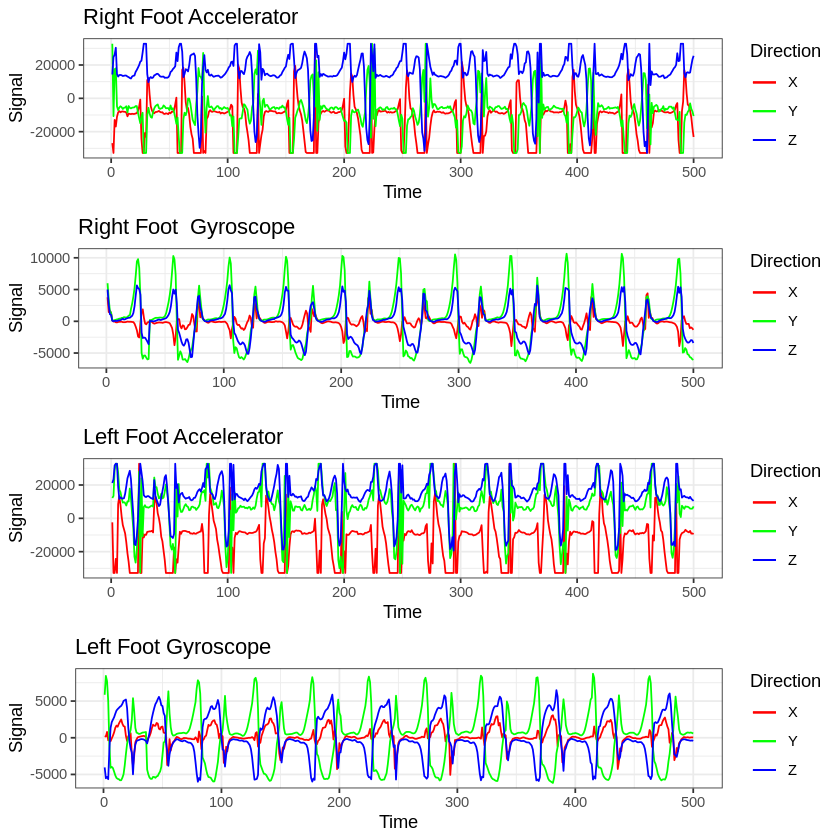

In [76]:

gait_dynamic_ts_foot_plot_fn(walking_01_02_df)

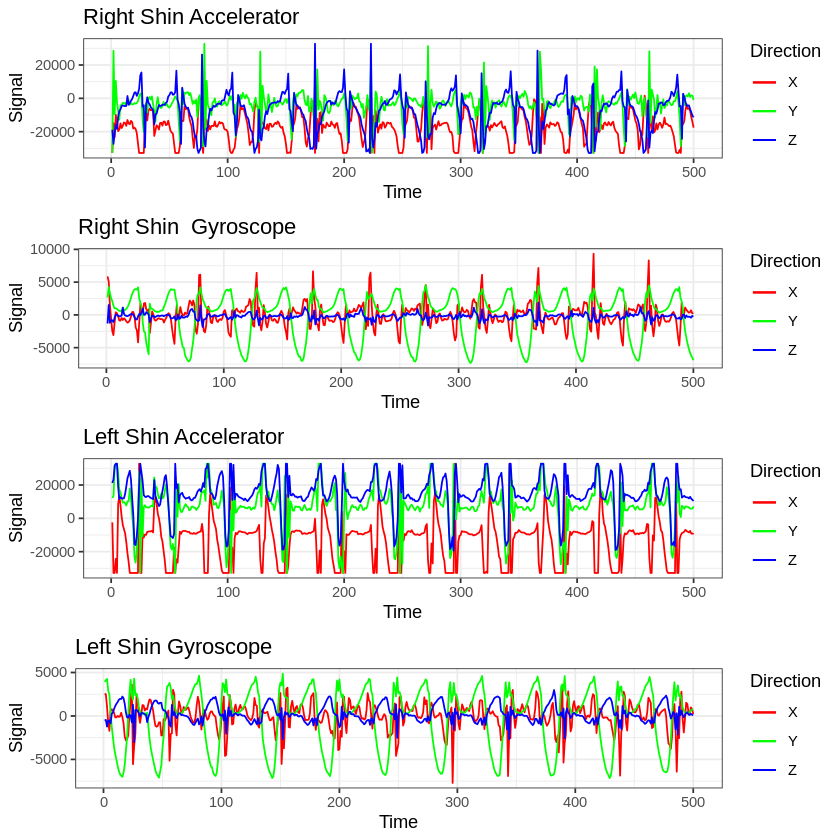

In [77]:
gait_dynamic_ts_shin_plot_fn(walking_01_02_df)

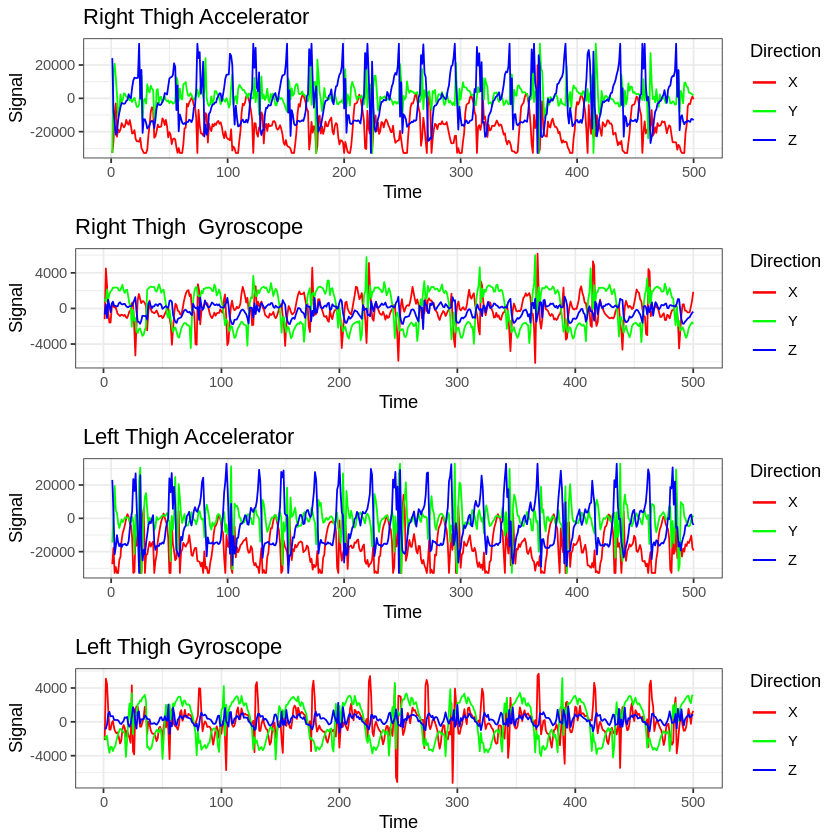

In [78]:
gait_dynamic_ts_thigh_plot_fn(walking_01_02_df)

## **Hierarchical clustering**

In [66]:
hierachical_clustering_fn = function(mydata, col_name,  row_start = 1, row_end = 500, plot_now = FALSE, clust_method = "ward.D2"){

sampledata = mydata[row_start:row_end, col_name] 

hc_sample_data = hclust(dist(sampledata), clust_method)

if (plot_now == TRUE){
  plot(hc_sample_data, xlab = "Clusters")
  plot(hc_sample_data, xlab = "Clusters")
  rect.hclust(hc_sample_data, k = 3, border = 2:4)
}


return(hc_sample_data)

}

In [81]:
col_names = colnames(walking_01_02_df)
col_names

[1] "acc_rf_x"  "acc_rf_y"  "acc_rf_z"  "gyro_rf_x" "gyro_rf_y" "gyro_rf_z"
 [7] "acc_rs_x"  "acc_rs_y"  "acc_rs_z"  "gyro_rs_x" "gyro_rs_y" "gyro_rs_z"
[13] "acc_rt_x"  "acc_rt_y"  "acc_rt_z"  "gyro_rt_x" "gyro_rt_y" "gyro_rt_z"
[19] "acc_lf_x"  "acc_lf_y"  "acc_lf_z"  "gyro_lf_x" "gyro_lf_y" "gyro_lf_z"
[25] "acc_ls_x"  "acc_ls_y"  "acc_ls_z"  "gyro_ls_x" "gyro_ls_y" "gyro_ls_z"
[31] "acc_lt_x"  "acc_lt_y"  "acc_lt_z"  "gyro_lt_x" "gyro_lt_y" "gyro_lt_z"
[37] "EMG_r"     "EMG_l"     "act"

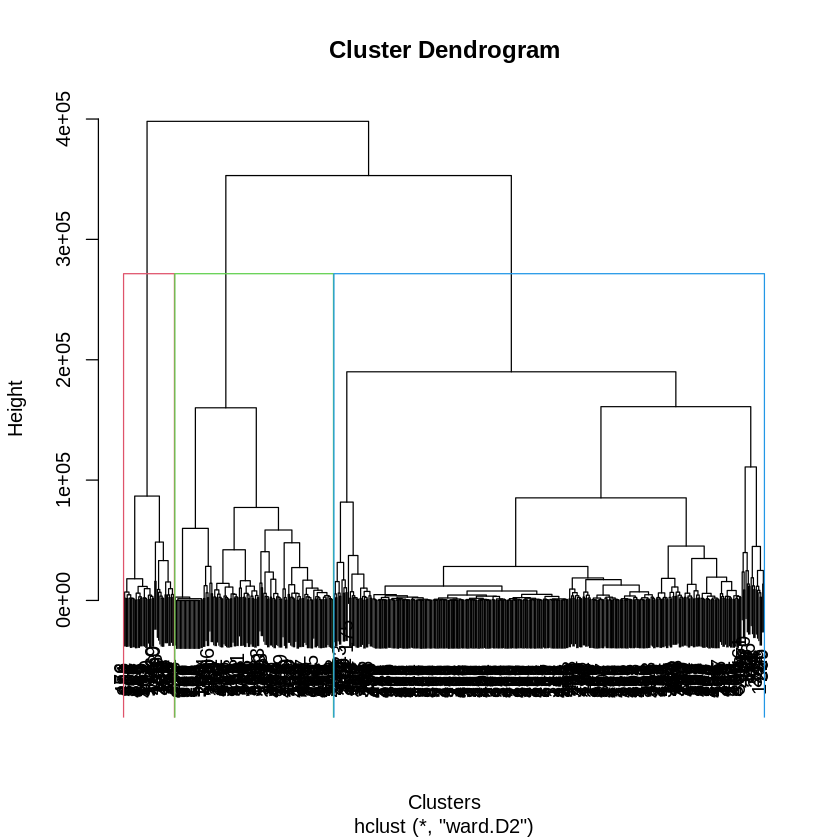

In [80]:
hc_acc_rf_x = hierachical_clustering_fn(walking_01_02_df, 'acc_rf_x')
hc_acc_rf_y = hierachical_clustering_fn(walking_01_02_df, 'acc_rf_y')
hc_acc_rf_z = hierachical_clustering_fn(walking_01_02_df, 'acc_rf_z')
hc_acc_rf = hierachical_clustering_fn(walking_01_02_df, col_names[1:3], plot_now = TRUE)

## Digital Encoding

In [104]:
digital_encoding_fn = function(hc_acc_rf_x, hc_acc_rf_y, hc_acc_rf_z, hc_acc_rf, sub_title = "" , start = 1, end = 500){
color_XYZ = c("X" = "red", "Y" = "green", "Z" = "blue")


state_acc_rf = data.frame(x = cutree(hc_acc_rf_x, 3),
                          y = cutree(hc_acc_rf_y, 3),
                          z = cutree(hc_acc_rf_z, 3),
                          hc27 = cutree(hc_acc_rf, 27),
                          hc10 = cutree(hc_acc_rf, 10))

# naturally combine the three digital code sequences from X, Y, Z
nc = apply(state_acc_rf, 1, function(x) paste(x[1], x[2], x[3], sep = ","))
state_acc_rf$nc = as.numeric(factor(nc, labels = 1:n_distinct(nc)))


# 3-state code sequence for X, Y, Z RF accelerator time series
p_st_x = ggplot(state_acc_rf, 
                aes(x = start:end, y = x, color = "X")) +
  geom_line() +
  scale_color_manual(values = color_XYZ) + 
  labs(x = "Time",
       y = "State",
       title = paste0(sub_title, " X-axis")) +
  theme_classic() +
  theme(legend.position = "none")

p_st_y = ggplot(state_acc_rf, 
                aes(x = start:end, y = y, color = "Y")) +
  geom_line() +
  scale_color_manual(values = color_XYZ) +
  labs(x = "Time",
       y = "State",
       title = paste0(sub_title, " Y-axis")) +
  theme_classic() +
  theme(legend.position = "none")

p_st_z = ggplot(state_acc_rf, 
                aes(x = start:end, y = z, color = "Z")) +
  geom_line() +
  scale_color_manual(values = color_XYZ) +
  labs(x = "Time",
       y = "State",
       title = paste0(sub_title, " Z-axis")) +
  theme_classic() +
  theme(legend.position = "none")

grid.arrange(p_st_x, p_st_y, p_st_z)

p_nc = ggplot(state_acc_rf, aes(x = start:end, y = nc)) +
  geom_line(color = "orange") +
  labs(x = "Time",
       y = "State",
       title = "Naturally-combinate (X,Y,Z)") +
  theme_classic()

# 27-state code sequence for the triplet time series
p_hc27 = ggplot(state_acc_rf, aes(x = start:end, y = hc27)) +
  geom_line(color = "darkgreen") +
  labs(x = "Time",
       y = "State",
       title = "Clustering-combinate (X,Y,Z), state: 27") +
  theme_classic() 

# 10-state code sequence for the triplet time series
p_hc10 = ggplot(state_acc_rf, aes(x = start:end, y = hc10)) +
  geom_line(color = "darkblue") +
  labs(x = "Time",
       y = "State",
       title = "Clustering-combinate (X,Y,Z), state: 10") +
  theme_classic()

grid.arrange(p_nc, p_hc27, p_hc10)

}

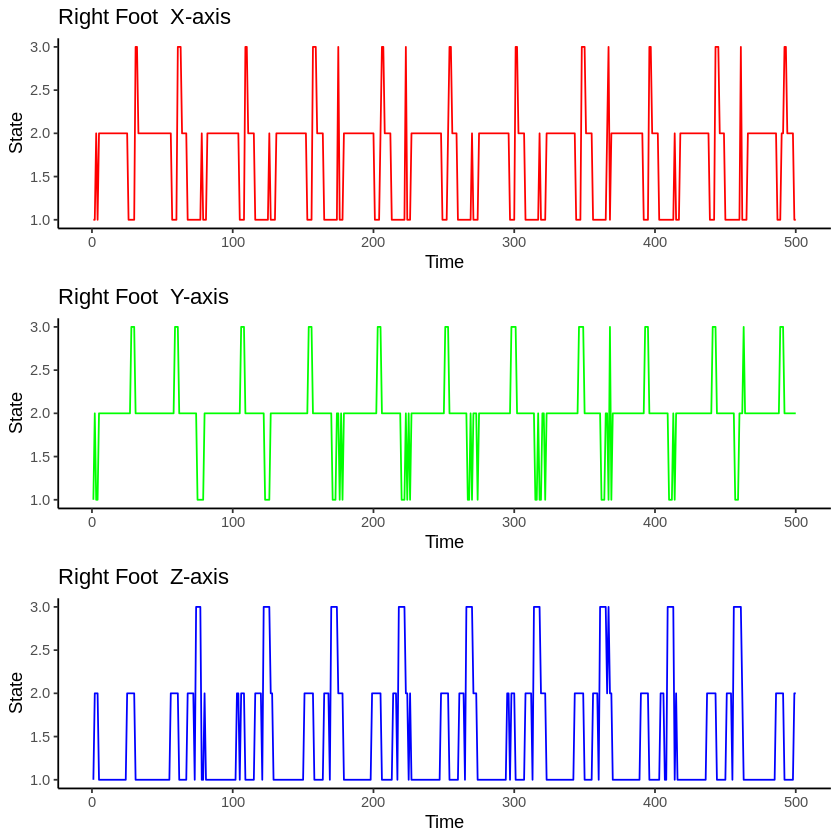

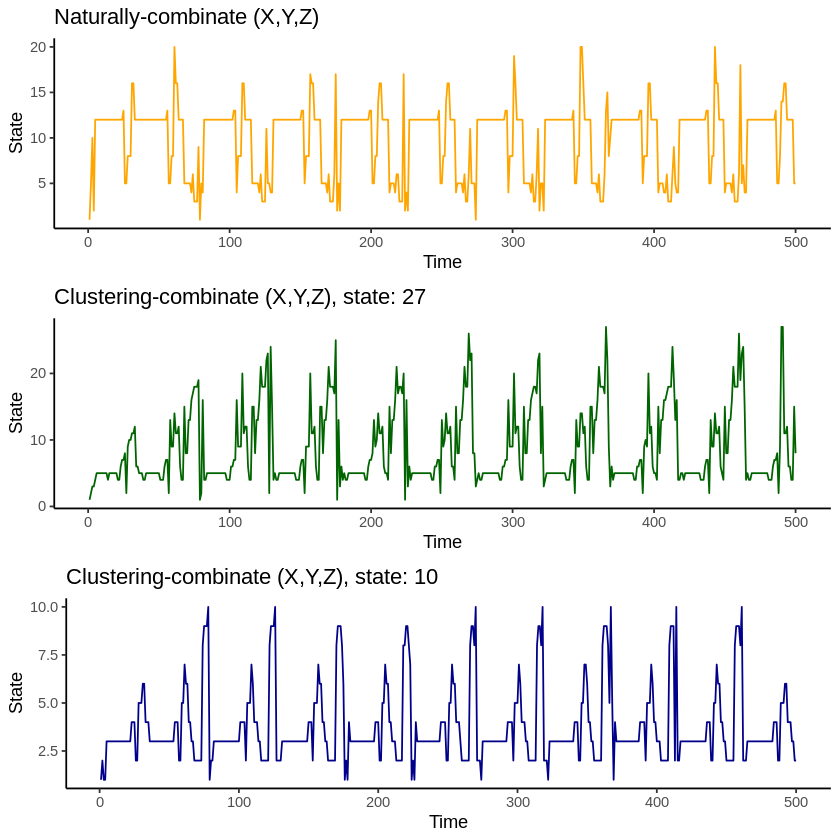

In [105]:
digital_encoding_fn(hc_acc_rf_x, hc_acc_rf_y, hc_acc_rf_z, hc_acc_rf, sub_title = "Right Foot " )

## **Empirircal Cumulative Distribution Function**